In [28]:
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 28,28).astype("float32") / 255
x_test = x_test.reshape(10000, 28,28).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [8]:
x_train.shape

(50000, 28, 28)

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2],1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1673 - accuracy: 0.9477 - val_loss: 0.0570 - val_accuracy: 0.9843
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0356 - val_accuracy: 0.9905
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0498 - val_accuracy:

313/313 - 1s - loss: 0.0537 - accuracy: 0.9861 - 997ms/epoch - 3ms/step


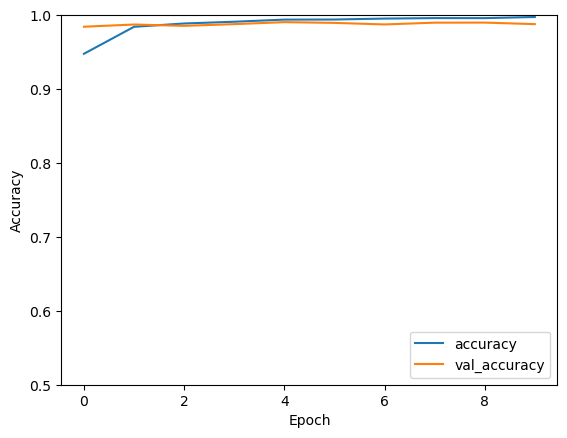

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)